<a href="https://colab.research.google.com/github/JessicaMishra/Geeksman_AISquad_Project1_Jessica/blob/master/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Collecting the dataset**


**Step-1**
Uploading kaggle.json file



In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


**Step-2**
Setting up environment variables for kaggle api to work

In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

**Step-3**
Downloading the dataset for kaggle

In [3]:
!kaggle datasets download -d jessicamishra/dataset

 96% 195M/204M [00:01<00:00, 141MB/s]
100% 204M/204M [00:01<00:00, 128MB/s]


**Step-4**
Unzipping downloaded data

In [4]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/quercus_marilandica/wb1245-10-3.jpg  
  inflating: train/quercus_marilandica/wb1245-10-4.jpg  
  inflating: train/quercus_marilandica/wb1246-01-1.jpg  
  inflating: train/quercus_marilandica/wb1246-01-2.jpg  
  inflating: train/quercus_marilandica/wb1246-01-3.jpg  
  inflating: train/quercus_marilandica/wb1246-01-4.jpg  
  inflating: train/quercus_marilandica/wb1246-02-1.jpg  
  inflating: train/quercus_marilandica/wb1246-02-2.jpg  
  inflating: train/quercus_marilandica/wb1246-02-3.jpg  
  inflating: train/quercus_marilandica/wb1246-02-4.jpg  
  inflating: train/quercus_marilandica/wb1246-03-1.jpg  
  inflating: train/quercus_marilandica/wb1246-03-2.jpg  
  inflating: train/quercus_marilandica/wb1246-03-3.jpg  
  inflating: train/quercus_marilandica/wb1246-03-4.jpg  
  inflating: train/quercus_marilandica/wb1246-04-1.jpg  
  inflating: train/quercus_marilandica/wb1246-04-2.jpg  
  inflating: train/quercus_marilandic

#  **Training the Data**

**Step-1**
Importing required libraries

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Step-2**
Batch size

In [7]:
bs=64

**Step-3**
Making Data bunch

In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("train"), valid_pct=0.2, bs=64, size=224)

**Looking at some examples in data**

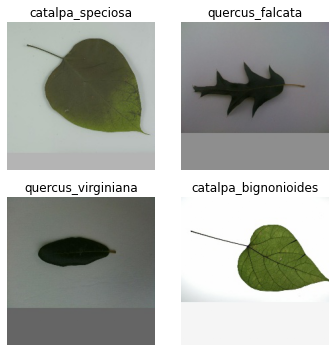

In [9]:
data.show_batch(rows=2, figsize=(5,5))

In [ ]:
print(data.classes)
len(data.classes)

['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum', 'acer_negundo', 'acer_palmatum', 'acer_pensylvanicum', 'acer_platanoides', 'acer_pseudoplatanus', 'acer_rubrum', 'acer_saccharinum', 'acer_saccharum', 'aesculus_flava', 'aesculus_glabra', 'aesculus_hippocastamon', 'aesculus_pavi', 'ailanthus_altissima', 'albizia_julibrissin', 'amelanchier_arborea', 'amelanchier_canadensis', 'amelanchier_laevis', 'asimina_triloba', 'betula_alleghaniensis', 'betula_jacqemontii', 'betula_lenta', 'betula_nigra', 'betula_populifolia', 'broussonettia_papyrifera', 'carpinus_betulus', 'carpinus_caroliniana', 'carya_cordiformis', 'carya_glabra', 'carya_ovata', 'carya_tomentosa', 'castanea_dentata', 'catalpa_bignonioides', 'catalpa_speciosa', 'cedrus_atlantica', 'cedrus_deodara', 'cedrus_libani', 'celtis_occidentalis', 'celtis_tenuifolia', 'cercidiphyllum_japonicum', 'cercis_canadensis', 'chamaecyparis_pisifera', 'chamaecyparis_thyoides', 'chionanthus_retusus', 'chionanthu

185

**Step-4**
Downloading the model for training


In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


**Step-5**
Training the model

In [11]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.091243,1.159702,0.683070,05:23
1,1.120256,0.659873,0.812880,05:16
2,0.688588,0.440482,0.867355,05:15
3,0.391017,0.303942,0.905832,05:15
4,0.219275,0.244505,0.923248,05:16
5,0.138511,0.222717,0.928109,05:18


**Unfreezing to train furthur**

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.883348,0.644057,0.806399,07:08
1,0.223982,0.139784,0.952612,07:05


In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.785389,1.472600,0.638923,07:00
1,0.303646,0.250988,0.913123,07:01
2,0.081316,0.101841,0.962130,07:07


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


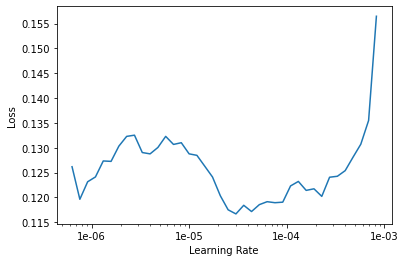

In [ ]:
learn.unfreeze() 
learn.lr_find()
learn.recorder.plot()

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

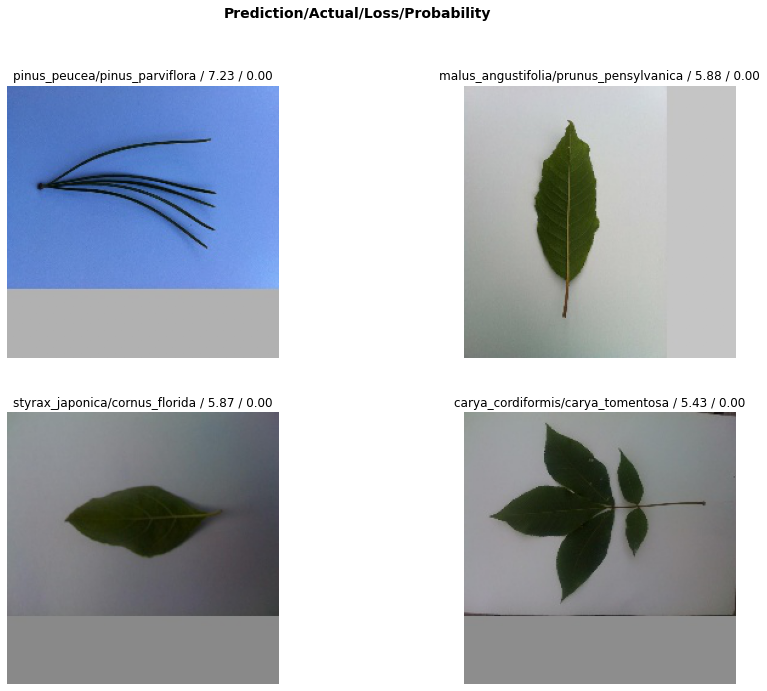

In [17]:
interp.plot_top_losses(4, figsize=(15,11))

In [18]:
doc(interp.plot_top_losses)

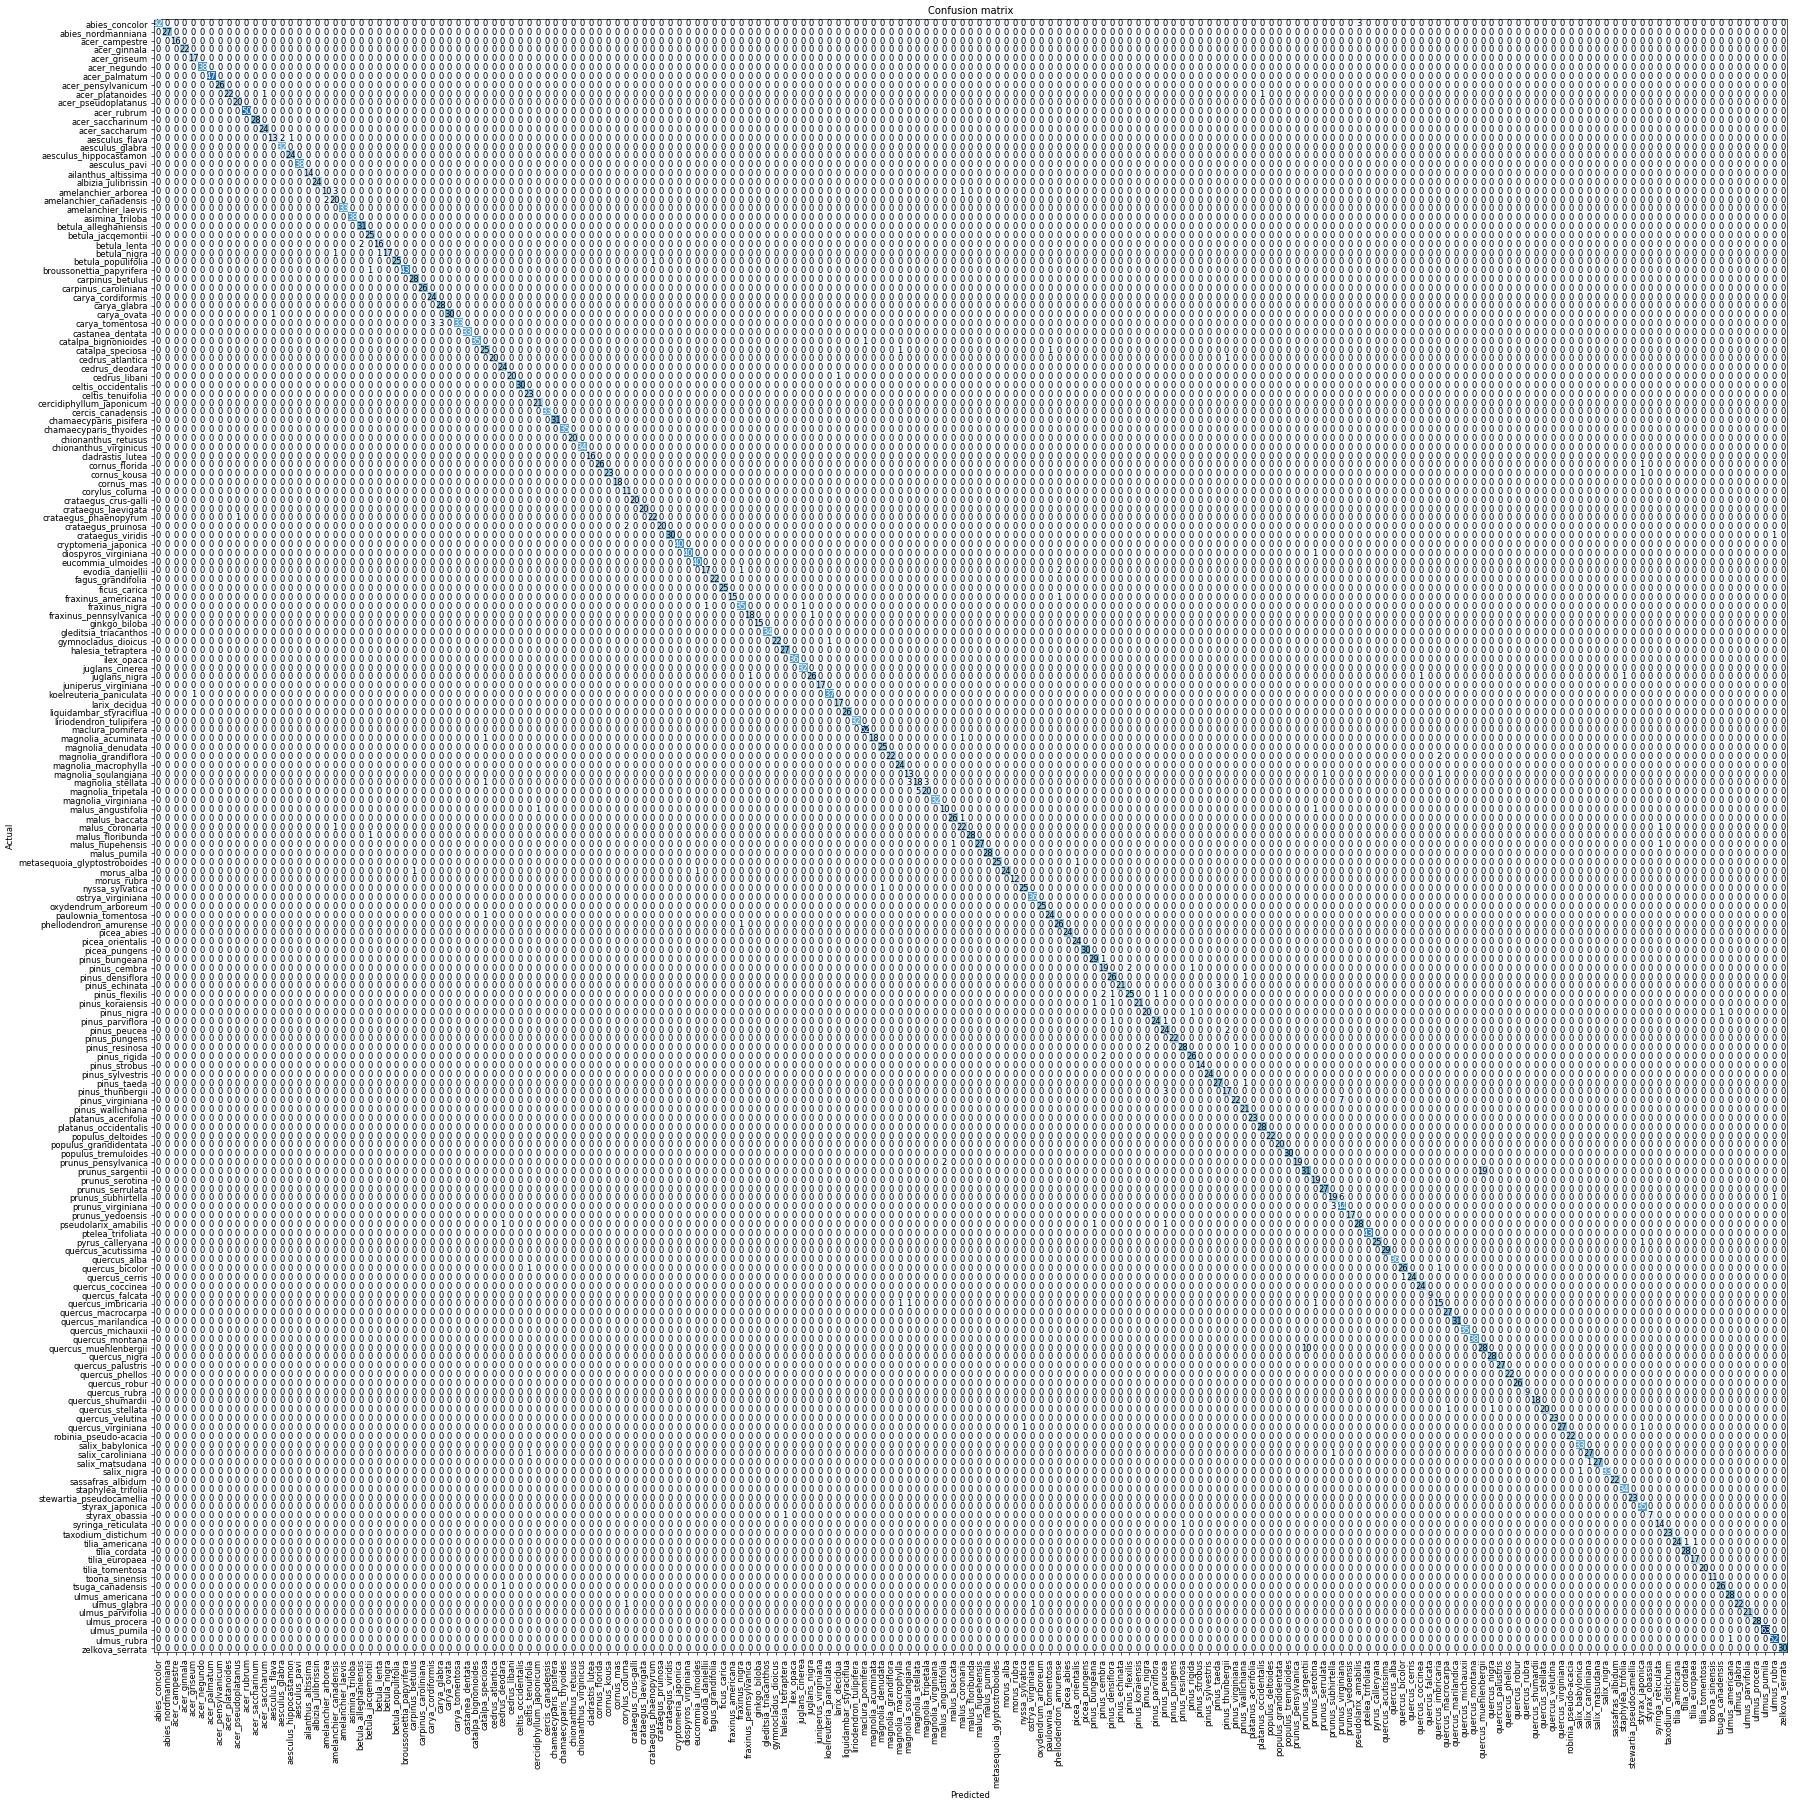

In [20]:
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

# **Saving the trainded data**

**Step-1**
Creating Directory

In [21]:
os.makedirs("/content/leaves/",exist_ok=True)

**Step-2**
Saving the path in a variable

In [22]:
my_dir="/content/leaves/"

**Step-3**
Saving and exporting


In [23]:
learn.save(my_dir+"/stage-1")

In [24]:
learn.export(my_dir+"/export.pkl")

**Step-4**
Using kora to save export.pkl and Stage 1.pth

In [25]:
!pip install -U kora

In [26]:
from kora.drive import upload_public

In [27]:
url_is = upload_public(my_dir+"/export.pkl")
url_is

'https://drive.google.com/uc?id=1nUxKu0TU4OEO5lXZl1FBcoyCl0_q0oDh'

In [ ]:
from kora.drive import upload_public
url_of = upload_public(my_dir+"/stage-1.pth")
url_of